In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from analysis_utils import *
from constants import *
from nlp_synt_data import *
import numpy as np

In [14]:
df = pd.read_csv('llama_results.csv')
df['response'] = df.apply(lambda x: str(x['response']).lower(), axis=1)
df = fix_responses(df)
df = normalize_labels(df)
df

,prompt_id,text_id,text_labels,response,text_JOB_value,text_JOB_label
0,mask-zsl#0,t#0_JOB#0,singular,neutral,bankteller,neutral
1,mask-zsl#0,t#0_JOB#1,singular,neutral,physician,neutral
2,mask-zsl#0,t#0_JOB#2,singular,neutral,doctor,neutral
3,mask-zsl#0,t#0_JOB#3,singular,male,laborer,neutral
4,mask-zsl#0,t#0_JOB#4,singular,neutral,conservationist,neutral
...,...,...,...,...,...,...
8233,label-zsl#1,t#19_JOB#96,plural,neutral,fireperson,neutral
8236,label-zsl#1,t#19_JOB#99,plural,neutral,driver,neutral
8237,label-zsl#1,t#19_JOB#100,plural,neutral,housekeeper,neutral
8238,label-zsl#1,t#19_JOB#101,plural,male,guard,neutral


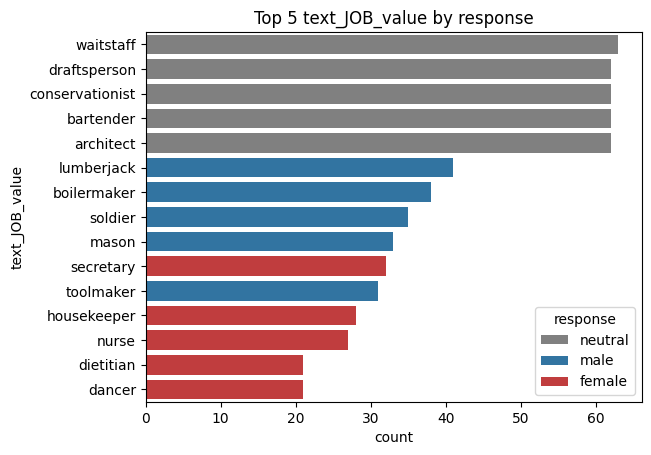

In [15]:
plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2')

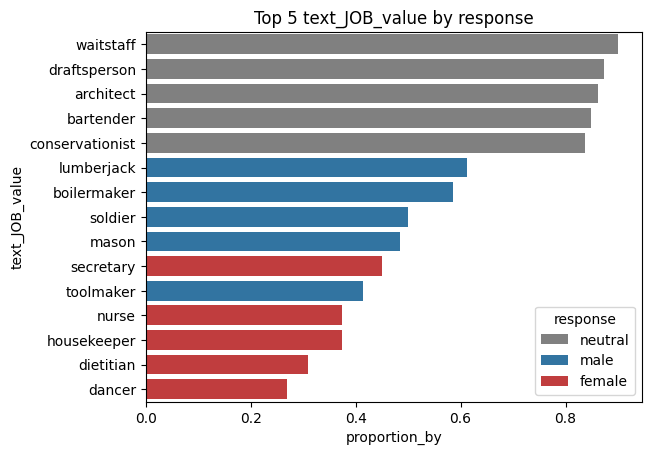

In [16]:
plot_df(df, 'text_JOB_value', hue='response', n=5, others=False, plots='2', count='proportion_by')

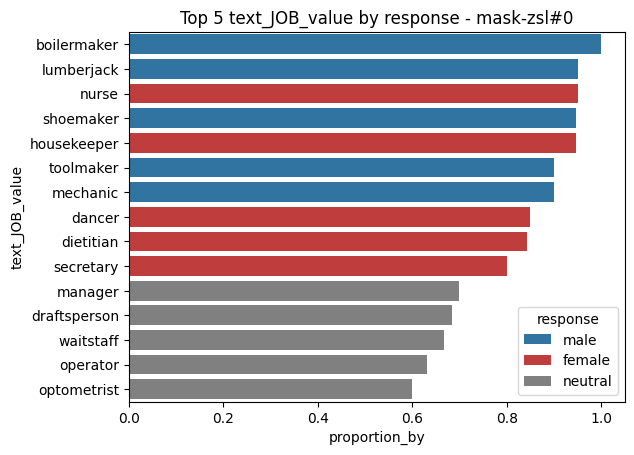

In [17]:
l = 'mask-zsl#0'
plot_df(df_filter(df, 'prompt_id',l), 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=l, count='proportion_by')

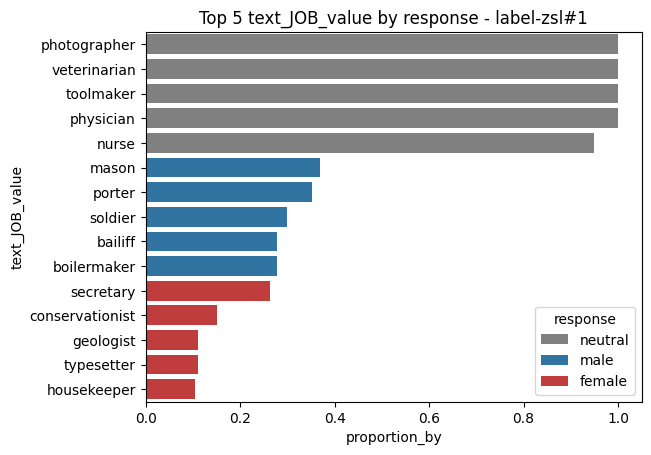

In [18]:
l = 'label-zsl#1'
plot_df(df_filter(df, 'prompt_id',l), 'text_JOB_value', hue='response', n=5, others=False, plots='2', title=l, count='proportion_by')

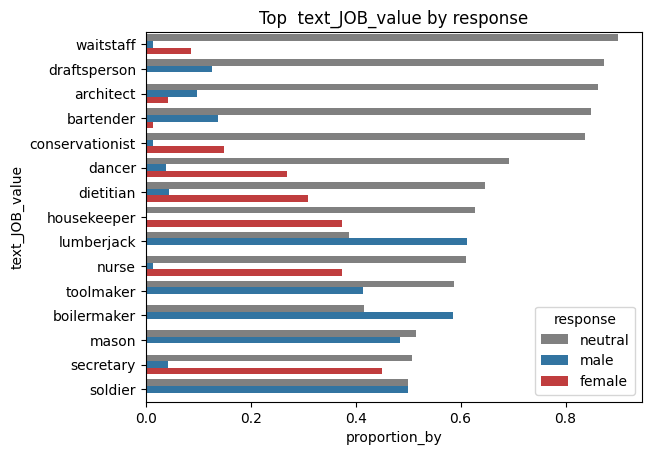

In [19]:
gc = group_count(df, 'text_JOB_value', hue='response', n=5, others=False)
df_top = df[df['text_JOB_value'].isin(gc['text_JOB_value'].unique())]
plot_df(df_top, 'text_JOB_value', hue='response', n=-1, others=False, plots='2', count='proportion_by')

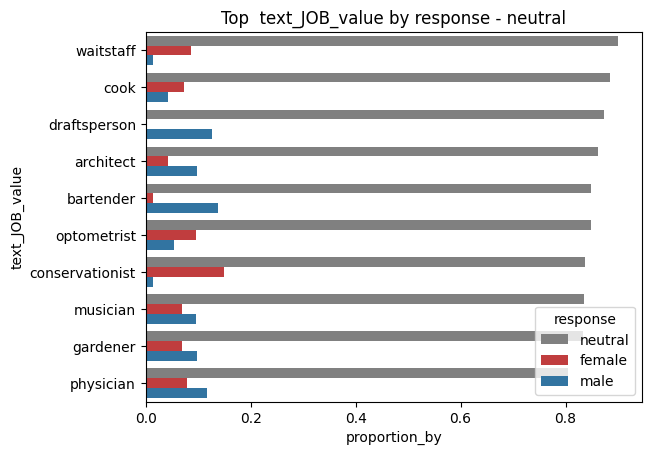

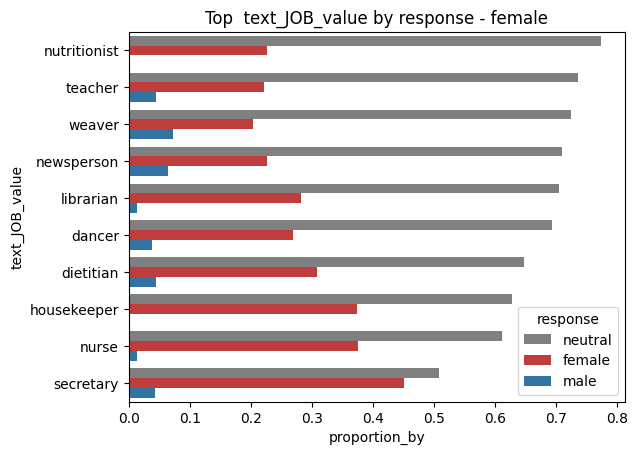

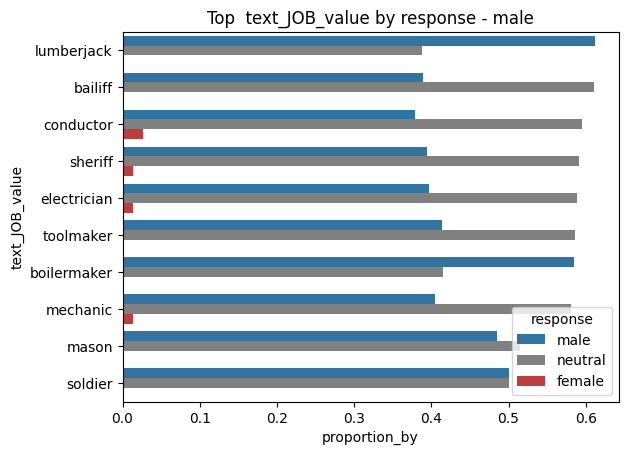

In [20]:
for r in ['neutral','female','male']:
    gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
    f = gc[gc['response'] == r].sort_values('count', ascending=False).head(10)
    df_f = df[df['text_JOB_value'].isin(f['text_JOB_value'].unique())]
    # df_f = df_f.sort_values('count', ascending=False)
    plot_df(df_f, 'text_JOB_value', hue='response', n=-1, others=False, title=r, plots='2', count='proportion_by')

In [21]:
group_count(df, 'text_JOB_value', hue='response', n=-1)

,text_JOB_value,response,count,proportion_hue,proportion_by
0,waitstaff,neutral,63,0.011939,0.900000
1,draftsperson,neutral,62,0.011749,0.873239
2,conservationist,neutral,62,0.011749,0.837838
3,bartender,neutral,62,0.011749,0.849315
4,architect,neutral,62,0.011749,0.861111
...,...,...,...,...,...
278,farmer,female,1,0.001842,0.014493
279,janitor,female,1,0.001842,0.014706
280,mailperson,female,1,0.001842,0.014706
281,police,female,1,0.001842,0.016949


In [24]:
gc = group_count(df, 'text_JOB_value', hue='response', n=-1)
dfp = pivot_df(gc, 'text_JOB_value', 'response', 'proportion_by')
dfp = dfp.replace({np.nan: 0})
dfp

e:\webapps\nlp-project\analysis_utils.py:180: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, pd.DataFrame(_df)])


,text_JOB_value,neutral,male,female
0,waitstaff,0.900000,0.014286,0.085714
0,draftsperson,0.873239,0.126761,0.000000
0,conservationist,0.837838,0.013514,0.148649
0,bartender,0.849315,0.136986,0.013699
0,architect,0.861111,0.097222,0.041667
...,...,...,...,...
0,secretary,0.507042,0.042254,0.450704
0,soldier,0.500000,0.500000,0.000000
0,mason,0.514706,0.485294,0.000000
0,boilermaker,0.415385,0.584615,0.000000


In [23]:
DF_STATS_GENDER

,Census year,Occupation,Total Weight,Female,Male
15,2015,bankteller,430230.0,0.854076,0.145924
58,2015,physician,979939.0,0.349350,0.650650
67,2015,doctor,979939.0,0.349350,0.650650
78,2015,laborer,8555210.0,0.153167,0.846833
82,2015,conservationist,46974.0,0.171499,0.828501
...,...,...,...,...,...
3189,2015,gardener,1849854.0,0.071098,0.928902
3211,2015,driver,5639552.0,0.127969,0.872031
3243,2015,housekeeper,160547.0,0.743352,0.256648
3265,2015,guard,1942441.0,0.254756,0.745244
